# Seattle Airbnb Analysis
In this notebook we are using the seatlle airbnb dataset from Kaggle ([link](https://www.kaggle.com/datasets/airbnb/seattle)) to better understand how the earning and pricing of different housing listing differs across various region and timeframe of the year.

In [51]:
# load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# load seatlle airbnb data from Kaggle

listings_df = pd.read_csv('./data/seattle/listings.csv')
reviews_df = pd.read_csv('./data/seattle/reviews.csv')
calendar_df = pd.read_csv('./data/seattle/calendar.csv')


## 1. Exploratory Data Analysis
In this section I will explore the dimensions of datasets and missingness ratio. Understand the timeframe and rented price a bit more.

Based on EDA, we will mostly leverage the listings dataset to understand how the different listing features intereact with its review scores and listed pricing.

* listings_df contains the details of each listings including its region, neighborhood, review score, property feature, renting rule, listed price, etc..


In [112]:
print(listings_df.shape)
print(listings_df.columns)
display(listings_df.head(5))


(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


* reviews dataset contains textual comment from customers along with comment date and corresponding listing id

In [31]:
print(reviews_df.shape)
print(reviews_df.columns)
reviews_df.head(5)

(84849, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


*  calendar_df listed the actual renting history with actual price paid 
(can be join to listings data frame through listing_id)

In [32]:
print(calendar_df.shape)
calendar_df.head(5)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64


Text(0.5, 1.0, 'Review Score Histogram')

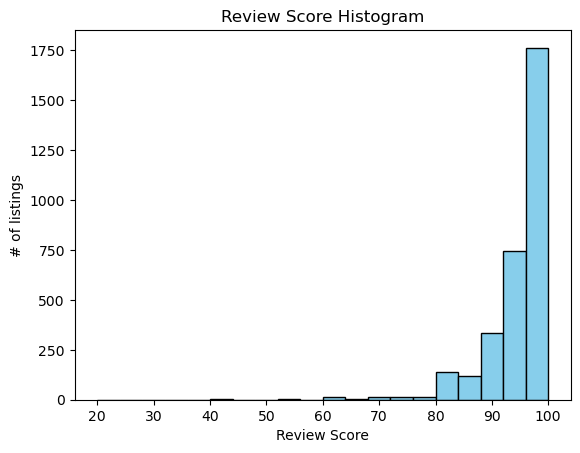

In [49]:
# explore the distribution of the listing reviews

print(listings_df['review_scores_rating'].describe())

plt.hist(listings_df['review_scores_rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('# of listings')
plt.title('Review Score Histogram')

In [97]:
# explore the relationship between selected variables
var_list= [
    'price', 
    'monthly_price',
    'weekly_price',
    'property_type',
    'room_type',
    'square_feet', 
    'beds',
    'cancellation_policy',
    'review_scores_rating', 
    'bedrooms',
    'host_is_superhost']
new_df = listings_df[var_list]

# convert cancellation column to numerical based on how strict the policy is
set(new_df['cancellation_policy'])
cancellation_d = {'flexible': 0,
    'moderate':1,
    'strict':2}
new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)

# convert price columns to numerical
new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')

/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/2992627184.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)
/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/2992627184.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')
/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/2992627184.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [80]:
new_df.head(6)

,price,monthly_price,weekly_price,property_type,room_type,square_feet,room_type,beds,cancellation_policy,review_scores_rating,bedrooms,host_is_superhost,cancellation_policy_num,price_clean
0,$85.00,NaN,NaN,Apartment,Entire home/apt,NaN,Entire home/apt,1.0,moderate,95.0,1.0,f,1,85.0
1,$150.00,"$3,000.00","$1,000.00",Apartment,Entire home/apt,NaN,Entire home/apt,1.0,strict,96.0,1.0,t,2,150.0
2,$975.00,NaN,NaN,House,Entire home/apt,NaN,Entire home/apt,7.0,strict,97.0,5.0,f,2,975.0
3,$100.00,"$2,300.00",$650.00,Apartment,Entire home/apt,NaN,Entire home/apt,2.0,flexible,NaN,0.0,f,0,100.0
4,$450.00,NaN,NaN,House,Entire home/apt,NaN,Entire home/apt,3.0,strict,92.0,3.0,f,2,450.0
5,$120.00,NaN,$800.00,House,Private room,NaN,Private room,1.0,strict,95.0,1.0,f,2,120.0


<AxesSubplot:>

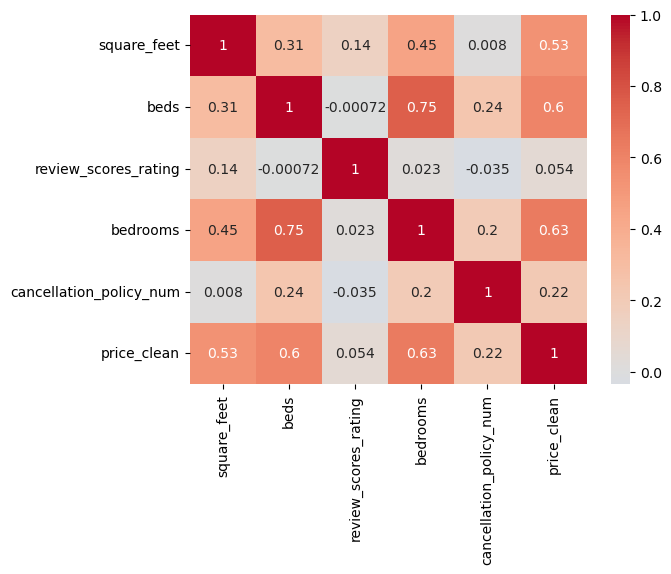

In [81]:
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', center= 0)

In [100]:
# what's the most common property type listed that has at least 1 review


# the property type that has highest price listed? 'Boat' follow by 'Condominium'
# the property type that has lowest price listed are 'Dorm' and 'Tent'
df_price_clean = new_df.dropna(subset=('price_clean'))
df_price_clean.groupby(['property_type']).mean().sort_values(['price_clean'], ascending=False)


,square_feet,beds,review_scores_rating,bedrooms,cancellation_policy_num,price_clean
property_type,,,,,,
Boat,300.000000,2.250000,95.600000,1.750000,0.625000,282.375000
Condominium,800.000000,1.692308,95.318841,1.241758,1.087912,151.109890
Loft,NaN,1.650000,95.454545,0.750000,1.150000,135.700000
House,1039.918367,1.948585,94.830021,1.608897,1.053695,131.850462
Townhouse,2100.000000,1.813559,96.625000,1.508475,0.966102,129.457627
Apartment,681.750000,1.528689,93.977591,1.033451,1.103630,122.932670
Camper/RV,NaN,1.692308,95.700000,0.692308,1.153846,120.461538
Bungalow,NaN,1.538462,97.666667,0.615385,0.692308,115.615385
Bed & Breakfast,2.000000,1.351351,95.730769,1.000000,0.810811,112.054054


In [96]:
new_df['room_type'].head(20)

,room_type,room_type
0,Entire home/apt,Entire home/apt
1,Entire home/apt,Entire home/apt
2,Entire home/apt,Entire home/apt
3,Entire home/apt,Entire home/apt
4,Entire home/apt,Entire home/apt
5,Private room,Private room
6,Private room,Private room
7,Private room,Private room
8,Private room,Private room
9,Entire home/apt,Entire home/apt


In [106]:
# what type of property are most rented in 2006?
calendar_df['price_clean'] = pd.to_numeric(calendar_df['price'].str.replace('$',''),errors='coerce')
calendar_df.groupby('listing_id').agg({
    'available':'size',
    sum_'price_clean':'sum'
})

/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/3437896982.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['price_clean'] = pd.to_numeric(calendar_df['price'].str.replace('$',''),errors='coerce')


,available,price_clean
listing_id,,
3335,365,37080.0
4291,365,29930.0
5682,365,16669.0
6606,365,33890.0
7369,365,4505.0
...,...,...
10332096,365,14600.0
10334184,365,43320.0
10339144,365,0.0
